In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from collections import OrderedDict
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Read the data file and assign it as a pandas dataframe

df = pd.read_csv("creditcard.csv")

# Take a peek at the dataframe values and indexes

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Take a look at the statistical features of the dataset

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# Check for null values

df.isnull().values.any()

False

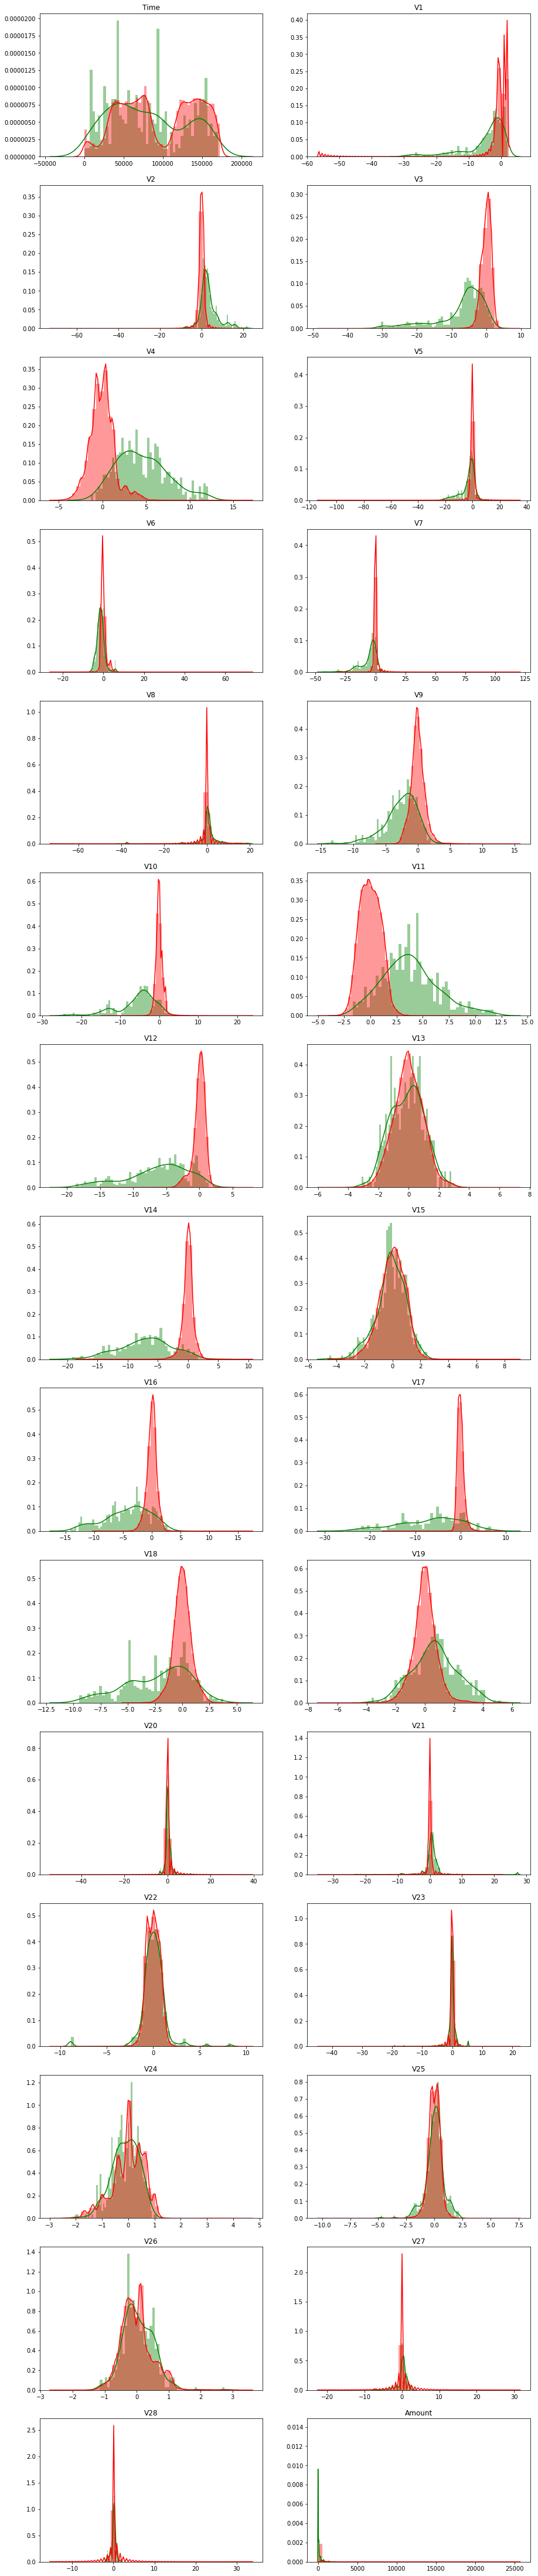

In [5]:
# Distribution plots of features

columns = df.iloc[:, :-1].columns

fraud = (df.Class == 1)
normal = (df.Class == 0)

grid = gridspec.GridSpec(15, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][fraud], bins = 50, color='g')
    sns.distplot(df[col][normal], bins = 50, color='r')
    ax.set_title(str(col))
    ax.set_xlabel('')
    
plt.show()

In [6]:
# We note that the 'Amount' feature is not normalized, so we have to scale it
# We also drop the 'Time' feature since it is not meaningful to the model

df['Amount_Scaled'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time','Amount'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


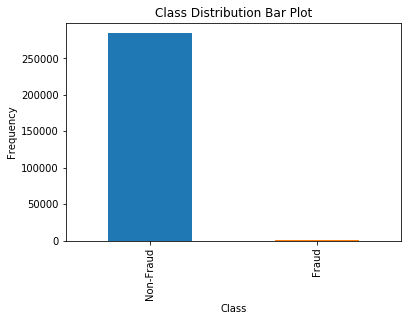

In [7]:
# Take a look at the dataset distribution by class labels. 
# We see that the dataset is clearly unbalanced, so we apply SMOTE (Oversampling)

class_freq = pd.value_counts(df['Class'], sort = True)
class_freq.plot(kind = 'bar')
plt.title("Class Distribution Bar Plot")
plt.xticks(np.arange(2), ('Non-Fraud', 'Fraud'))
plt.xlabel("Class")
plt.ylabel("Frequency");

In [8]:
# Split features (X) from labels (y)

column_indexes = df.columns.values.tolist()
column_indexes.remove('Class')
X = np.array(df.iloc[:, df.columns != 'Class'])
y = np.array(df.iloc[:, df.columns == 'Class'])

# Create train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=255)
y_train = y_train.ravel()

print("Train dataset samples: ", X_train.shape[0])
print("Test dataset samples: ", X_test.shape[0])

Train dataset samples:  227845
Test dataset samples:  56962


In [9]:
# We use a RandomForestClassifier to calculate relative feature importance

clf_rf = RandomForestClassifier(n_estimators = 50, max_depth = 4)      
clf_rf = clf_rf.fit(X_train,y_train)
importances = clf_rf.feature_importances_
fea_dict = OrderedDict()

print("Feature ranking:")
for i in range(X_train.shape[1]):
    fea_dict[column_indexes[i]] = importances[i] 

fea_dict_sorted = OrderedDict(sorted(fea_dict.items(), reverse=True, key=lambda x: x[1]))

i = 0
for k, v in fea_dict_sorted.items():
    i += 1
    print("{}. {} ({})".format(i, k, v))

Feature ranking:
1. V12 (0.23032763584782395)
2. V17 (0.211894572685183)
3. V14 (0.1323084243255554)
4. V16 (0.06988165813990377)
5. V10 (0.06838075880519177)
6. V11 (0.060974608153207877)
7. V9 (0.05587982289827985)
8. V18 (0.030095670345764148)
9. V7 (0.025442942285129302)
10. V4 (0.0196381468701617)
11. V3 (0.017834447982609126)
12. V26 (0.011067756282986256)
13. V21 (0.009892863586021651)
14. V8 (0.009444969321536531)
15. V27 (0.006529162038903628)
16. V20 (0.005573162924102613)
17. V6 (0.005171147861197994)
18. V28 (0.004462818863007917)
19. V5 (0.004391008685072834)
20. V22 (0.003974611879941741)
21. V2 (0.0037861203596114956)
22. V15 (0.0028820881832821855)
23. V24 (0.0024973688260082317)
24. Amount_Scaled (0.002306114232610526)
25. V25 (0.0021942798977845155)
26. V1 (0.0013433011579796282)
27. V19 (0.0009305079695741234)
28. V13 (0.0004656032705967586)
29. V23 (0.0004284263209715417)


In [10]:
# Apply SMOTE

print("Before SMOTE, counts of label '1': {}".format(int(sum(y_train==1))))
print("Before SMOTE, counts of label '0': {} \n".format(int(sum(y_train==0))))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print("After SMOTE, counts of label '1': {}".format(sum(y_train_res==1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_res==0)))

Before SMOTE, counts of label '1': 390
Before SMOTE, counts of label '0': 227455 

After SMOTE, counts of label '1': 227455
After SMOTE, counts of label '0': 227455


In [11]:
# RandomForestClassifier Hyperparameters Search Grid

rf_grid = {"n_estimators": [10, 20, 50, 100],
           "max_features": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
          }

# Perform RandomizedSearchCV

rf_model = RandomizedSearchCV(RandomForestClassifier(), rf_grid, cv=5, scoring='f1')

# Fit RandomForestClassifer to train data set

rf_model.fit(X_train, y_train)

# Set the best estimator as model

rf_score = rf_model.best_score_
print("Best estimator score for RF", rf_score)

# Logistic Regression

lr_grid = {"C": [0.01, 0.1, 1, 10, 100],
           "penalty": ['l1', 'l2']
          }
lr_model = RandomizedSearchCV(LogisticRegression(), lr_grid, cv=5, scoring='f1')
lr_model.fit(X_train, y_train)
lr_score = lr_model.best_score_
print("Best estimator score for LR", lr_score)

# MLPClassifier

mlp_grid = {"alpha": [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
            "hidden_layer_sizes": [50, 100, 200, 300]
           }
mlp_model = RandomizedSearchCV(MLPClassifier(), mlp_grid, cv=5, scoring='f1')
mlp_model.fit(X_train, y_train)
mlp_score = mlp_model.best_score_
print("Best estimator score for MLP", mlp_score)

Best estimator score for RF 0.8618964247643934
Best estimator score for LR 0.7360472098114524
Best estimator score for MLP 0.8461846456754345


In [12]:
# Predict using the test set

rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
mlp_pred = mlp_model.predict(X_test)

# Helper to print metric results (accuracy, precision, recall, f1_score, roc_auc)

def print_results(title, true_value, pred):
    print(title)
    print("Accuracy: {}".format(accuracy_score(true_value, pred)))
    print("Precision: {}".format(precision_score(true_value, pred)))
    print("Recall: {}".format(recall_score(true_value, pred)))
    print("F1: {}".format(f1_score(true_value, pred)))

print_results("Random Forest Classifer Results", y_test, rf_pred)
print("Confusion Matrix: ")
print(confusion_matrix(y_test, rf_pred))
print("\n")

print_results("Logistic Regression Results", y_test, lr_pred)
print("Confusion Matrix: ")
print(confusion_matrix(y_test, lr_pred))
print("\n")

print_results("MLP Classifier Results:", y_test, mlp_pred)
print("Confusion Matrix: ")
print(confusion_matrix(y_test, mlp_pred))

Random Forest Classifer Results
Accuracy: 0.9994733330992591
Precision: 0.9615384615384616
Recall: 0.7352941176470589
F1: 0.8333333333333333
Confusion Matrix: 
[[56857     3]
 [   27    75]]


Logistic Regression Results
Accuracy: 0.9990871107053826
Precision: 0.8571428571428571
Recall: 0.5882352941176471
F1: 0.6976744186046512
Confusion Matrix: 
[[56850    10]
 [   42    60]]


MLP Classifier Results:
Accuracy: 0.9994557775359011
Precision: 0.9080459770114943
Recall: 0.7745098039215687
F1: 0.835978835978836
Confusion Matrix: 
[[56852     8]
 [   23    79]]
